In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import data_cleaning as dc
%load_ext autoreload
%autoreload 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
housing = pd.read_csv('data/nashville-housing.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:

#Filter out Land Use Categories with less than 10 entries
filtered_landuse = dc.remove_small_groupings(housing,"LandUse",10)
filtered_landuse['LandUse'] = filtered_landuse['LandUse'].replace('VACANT RES LAND', 'VACANT RESIDENTIAL LAND')
filtered_landuse


,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.30,GENERAL SERVICES DISTRICT,50000.00,168200.00,235700.00,1986.00,3.00,3.00,0.00
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.50,GENERAL SERVICES DISTRICT,50000.00,264100.00,319000.00,1998.00,3.00,3.00,2.00
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.90,GENERAL SERVICES DISTRICT,50000.00,216200.00,298000.00,1987.00,4.00,3.00,0.00
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.60,GENERAL SERVICES DISTRICT,50000.00,147300.00,197300.00,1985.00,3.00,3.00,0.00
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.00,GENERAL SERVICES DISTRICT,50000.00,152300.00,202300.00,1984.00,4.00,3.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

t_housing = dc.remove_unwanted_columns(filtered_landuse,['OwnerName','OwnerAddress','LegalReference'])
# t_housing = filtered_landuse.drop(columns=['OwnerName','OwnerAddress','LegalReference'])
t_housing = filtered_landuse.dropna(subset=['Acreage', 'TaxDistrict','LandValue','BuildingValue',"SalePrice"])
t_housing['SalePrice'] = pd.to_numeric(t_housing.loc[:,'SalePrice'],errors='coerce')

In [19]:
pie_group = t_housing['LandUse'].value_counts().head(5)

In [20]:
pie_group.sort_values(ascending=False)

SINGLE FAMILY              21875
VACANT RESIDENTIAL LAND     1690
DUPLEX                      1253
ZERO LOT LINE                845
TRIPLEX                       84
Name: LandUse, dtype: int64

<Axes: title={'center': 'Nashville Land Use Percentages'}, ylabel=' '>

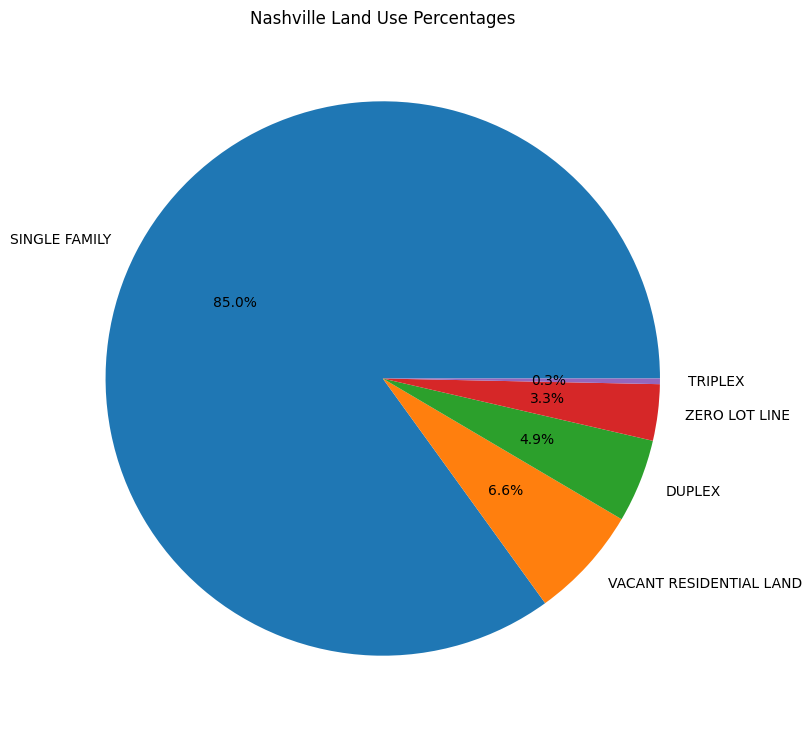

In [21]:

pie_group.plot(kind='pie',title="Nashville Land Use Percentages", figsize=(20,9),ylabel=" ",  labels=pie_group.index, autopct ="%1.1f%%" )


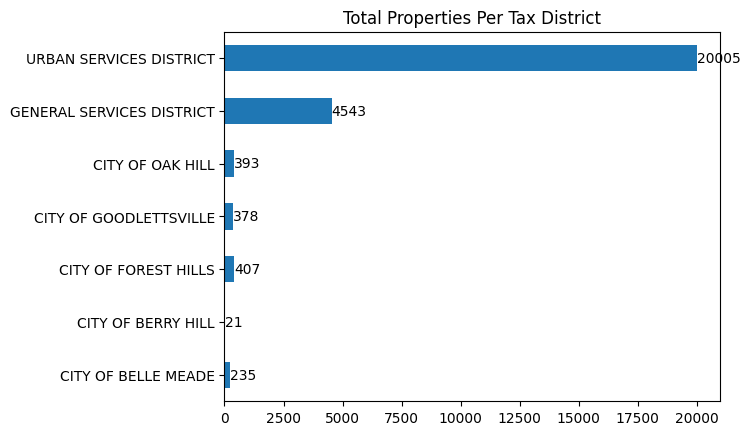

In [30]:
tax_district= t_housing.groupby('TaxDistrict')["LandUse"].size()
ax = tax_district.plot.barh(title="Total Properties Per Tax District", ylabel="")
ax.ticklabel_format(style='plain', axis='x')
for i, count in enumerate(tax_district):
    ax.annotate(str(count), xy=(count, i), va='center')


Text(0.5, 0, 'Sale Price')

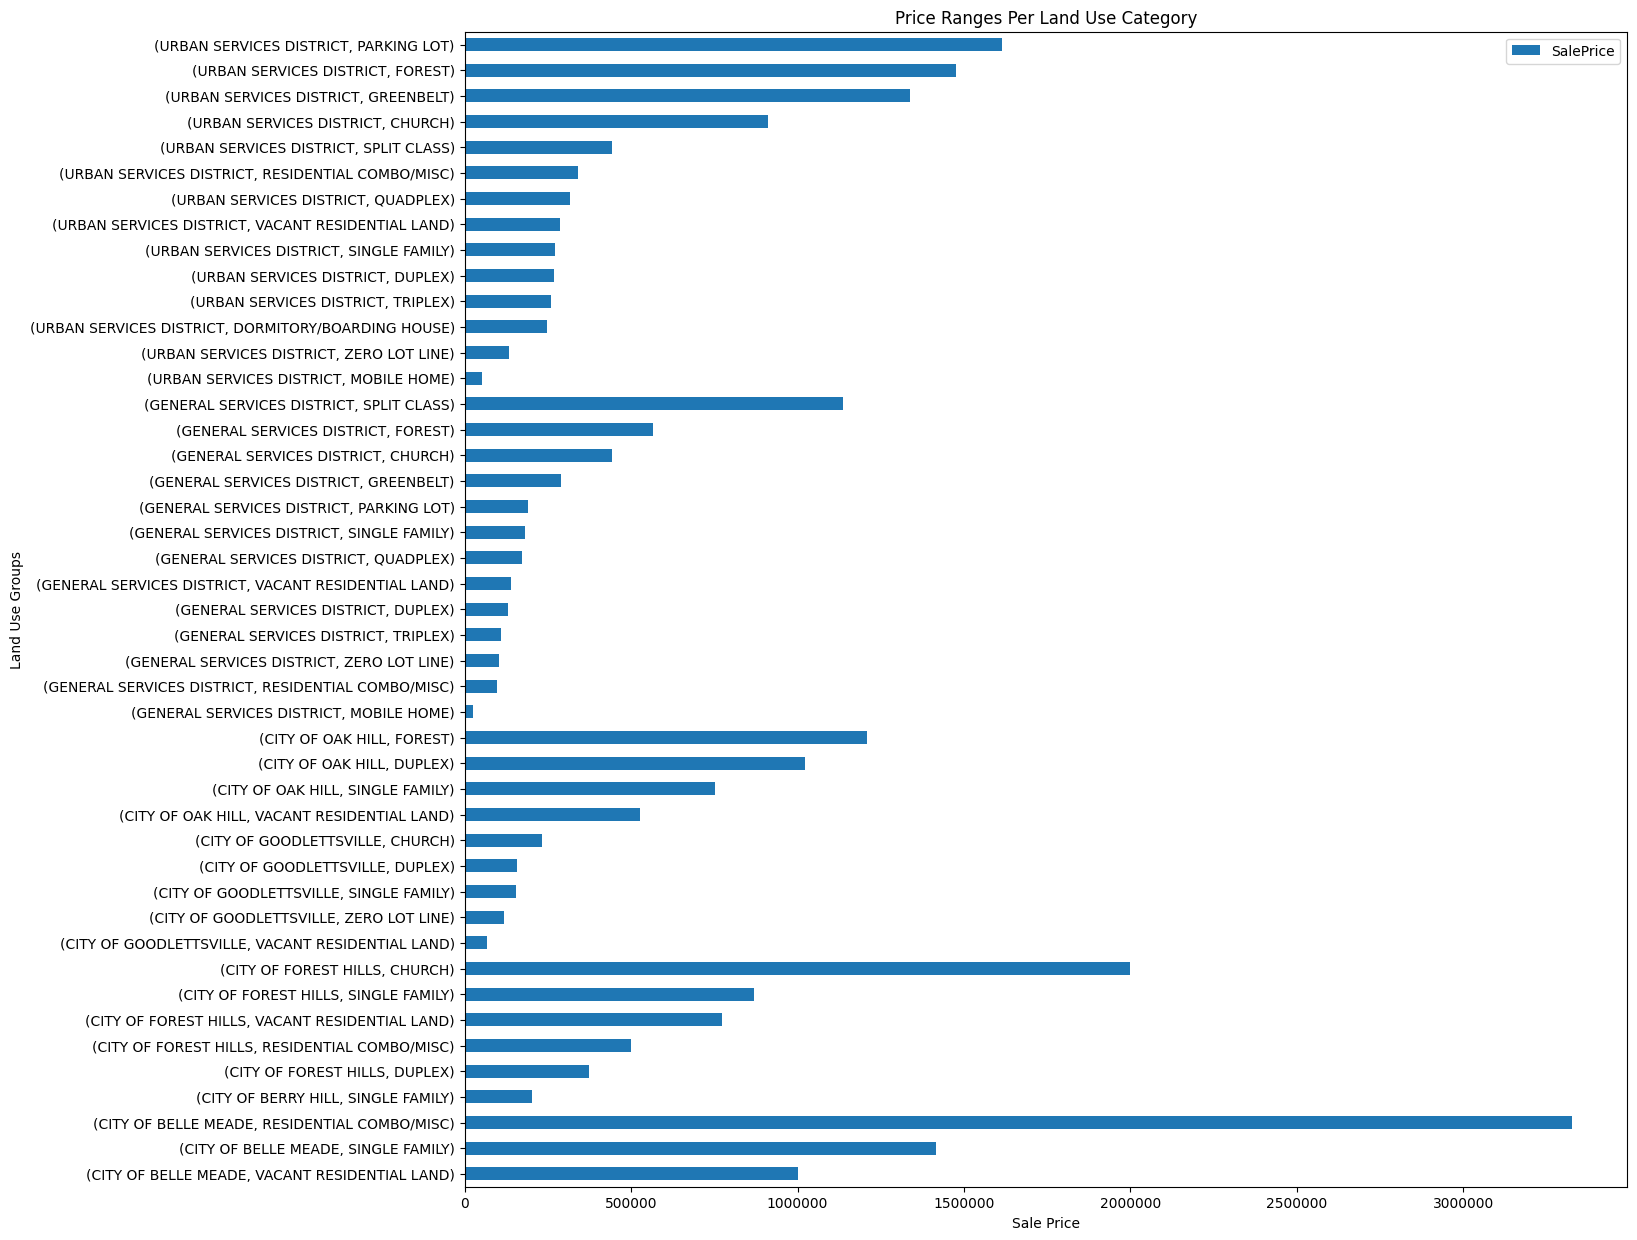

In [26]:
tax_district= t_housing.groupby(["TaxDistrict","LandUse"])["SalePrice"].mean().to_frame()
tax_district=tax_district.sort_values(by=["TaxDistrict","SalePrice"], ascending=True)
fig, ax = plt.subplots(figsize=(15,15))
tax_district= dc.filter_outliers(tax_district, 'SalePrice')
tax_district.plot(kind='barh', stacked=True,ax=ax)
ax.ticklabel_format(style='plain', axis='x')
ax.set_title("Price Ranges Per Land Use Category")
ax.set_ylabel("Land Use Groups")
ax.set_xlabel("Sale Price")




In [ ]:
t_housing['AcreageToCost'] = t_housing['LandValue']/ t_housing["Acreage"]
t_housing['SaleDifference'] = t_housing['SalePrice'] - t_housing["TotalValue"]
average_cost = t_housing.groupby(["LandUse"]).mean().sort_values(by = "SaleDifference", ascending=False)
average_cost = average_cost.drop("UniqueID", axis=1)
average_cost = average_cost.fillna(0)
average_cost


C:\Users\beans\AppData\Local\Temp\ipykernel_45864\746347363.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_cost = t_housing.groupby(["LandUse"]).mean().sort_values(by = "SaleDifference", ascending=False)


,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,AcreageToCost,SaleDifference
LandUse,,,,,,,,,,,
VACANT COMMERCIAL LAND,5450000.00,0.17,26588.89,0.00,26588.89,0.00,0.00,0.00,0.00,140287.76,5423411.11
PARKING LOT,1225336.36,0.32,77309.09,0.00,90881.82,0.00,0.00,0.00,0.00,168833.69,1134454.55
FOREST,1085330.00,20.08,299433.40,9090.00,310493.40,1940.67,3.00,1.67,0.00,8101.86,774836.60
GREENBELT,604938.50,19.16,59922.70,79040.00,159312.70,1953.75,3.75,2.00,0.25,4544.40,445625.80
RESIDENTIAL COMBO/MISC,342005.49,0.82,79902.63,122042.11,206315.79,1975.51,3.51,2.47,0.38,219052.42,135689.70
QUADPLEX,304858.33,0.26,59483.33,118655.56,178197.22,1953.09,6.09,3.94,0.03,237671.13,126661.11
SPLIT CLASS,581851.13,3.86,139480.00,301673.33,457046.67,1943.54,4.00,2.62,0.62,157386.07,124804.47
VACANT RESIDENTIAL LAND,292894.10,0.97,72153.46,106693.96,180068.78,2013.34,3.43,2.19,0.61,165886.19,112825.32
CHURCH,864828.12,2.23,101290.62,624450.00,759303.12,1967.84,1.08,0.62,0.09,144718.30,105525.00


Text(0.5, 1.0, 'Mean Cost Breakdown of Land by Categories')

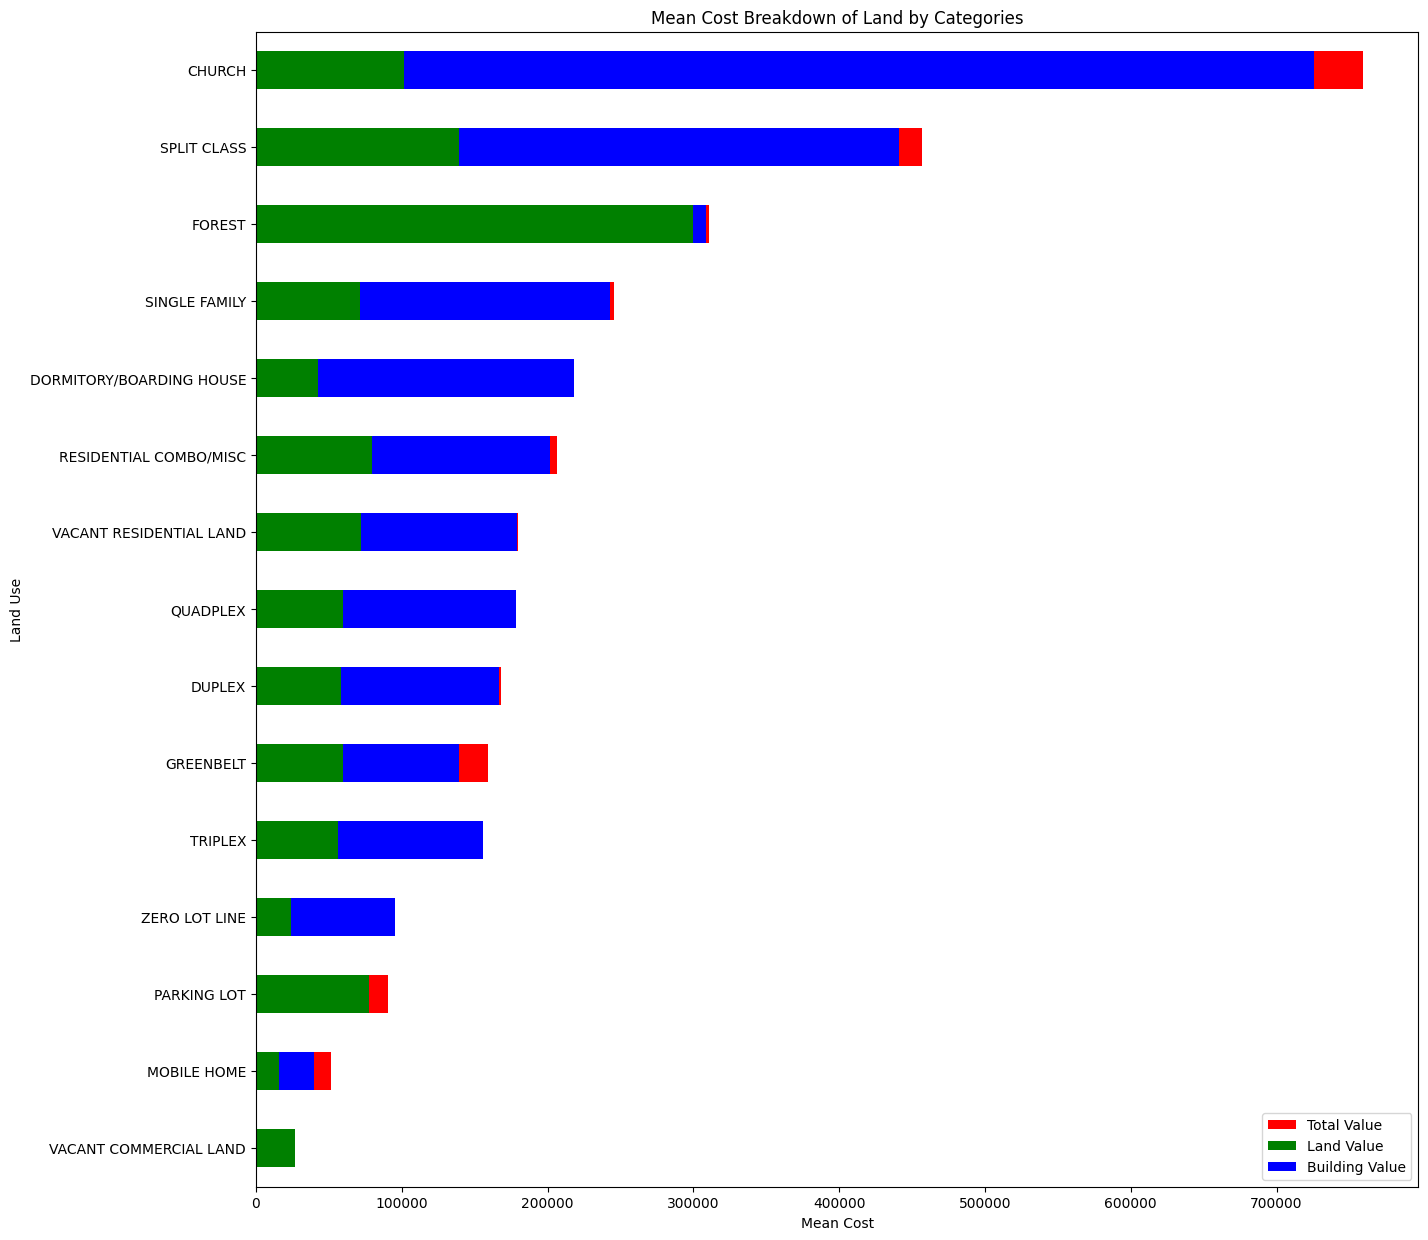

In [ ]:
average_cost_chart = average_cost[["LandValue","SalePrice","BuildingValue","TotalValue","SaleDifference"]].sort_values(by='TotalValue',ascending=True)
average_cost_chart = average_cost_chart[average_cost_chart['TotalValue'] != 0]
fig, ax = plt.subplots(figsize=(15,15))

# Plotting the Total Value as a line plot
average_cost_chart['TotalValue'].plot(kind="barh",ax=ax, color='red')
# Plotting the mean values of Land Value and Building Value as horizontal stacked bars
average_cost_chart[['LandValue', 'BuildingValue']].plot(kind='barh', stacked=True, ax=ax, color=['green','blue'])
ax.legend(["Total Value","Land Value", "Building Value"])
plt.xlabel('Mean Cost')
plt.ylabel('Land Use')
plt.title('Mean Cost Breakdown of Land by Categories')



Text(0.5, 0, 'Sale Price')

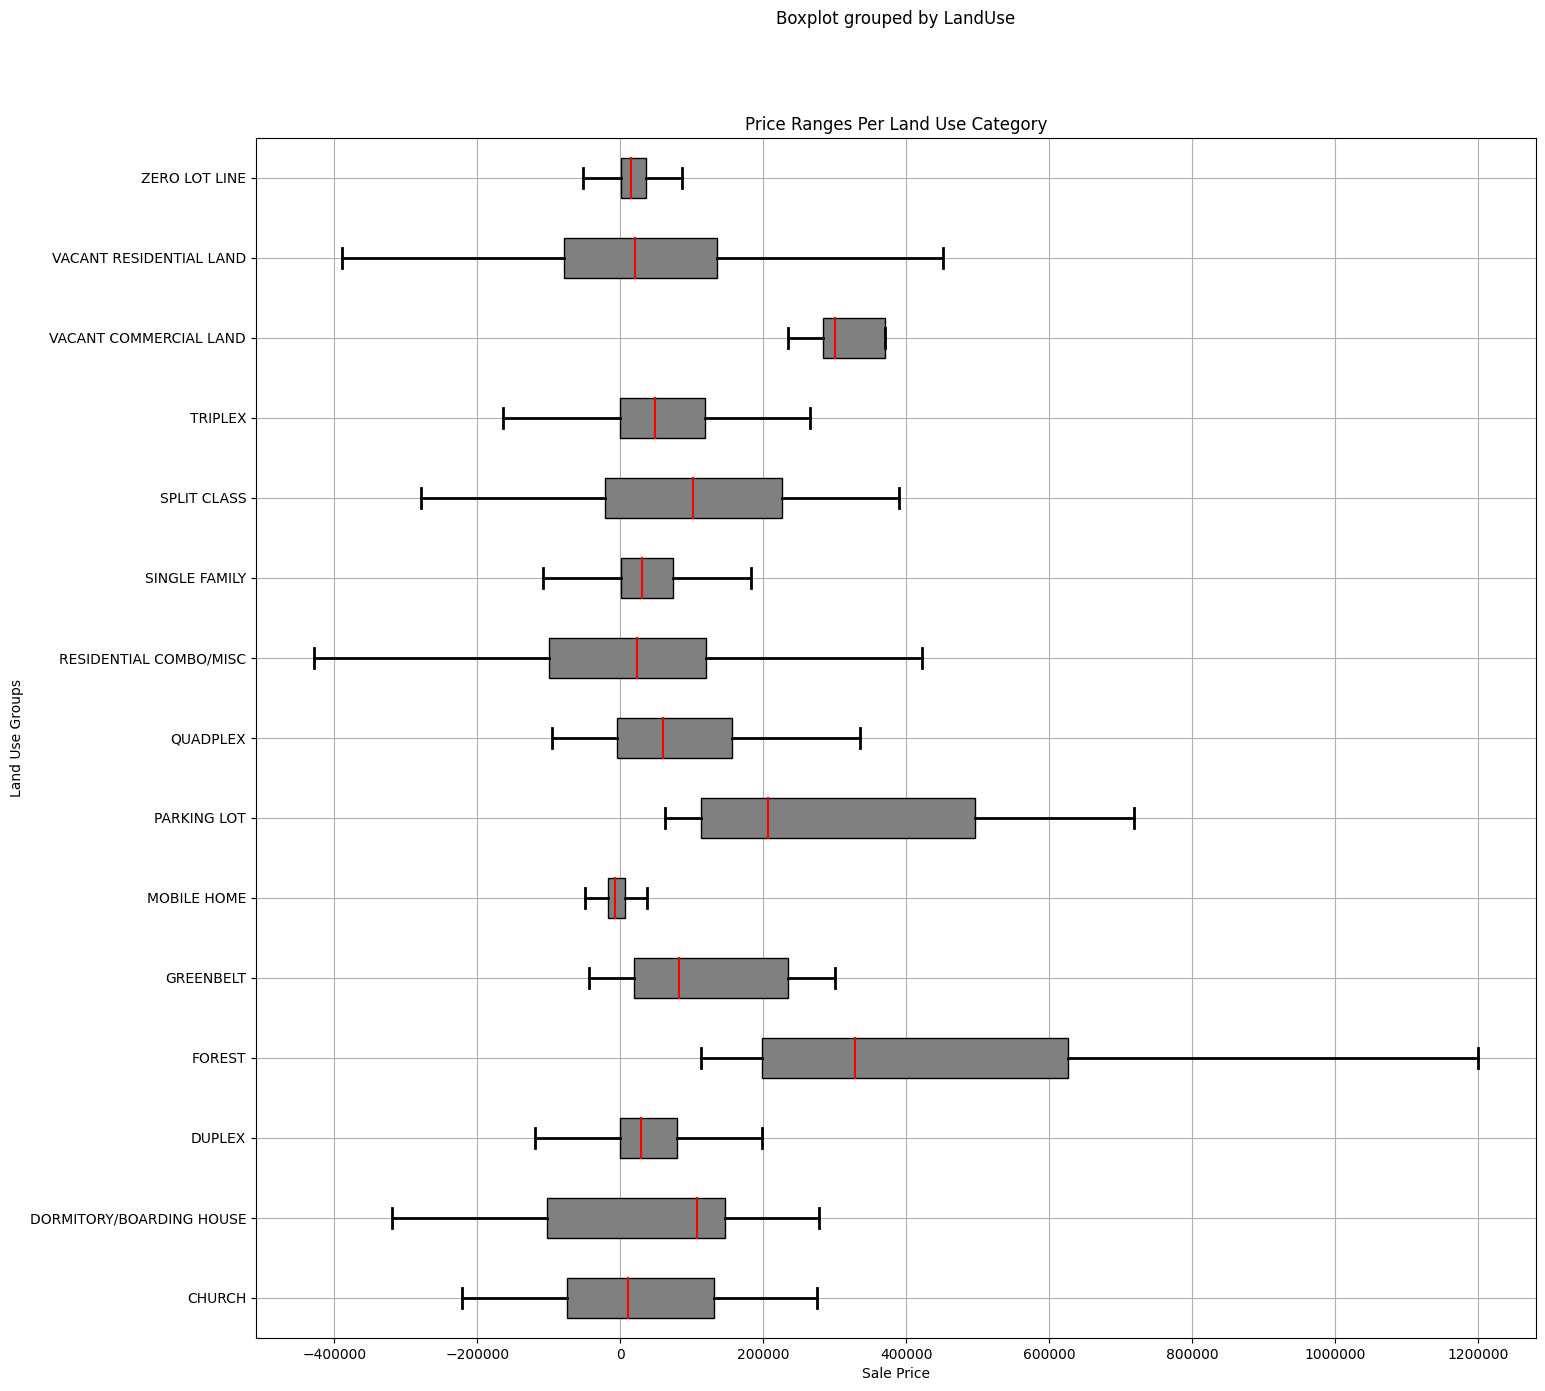

In [ ]:

th_filtered = dc.filter_outliers(t_housing, 'SalePrice')
ax =th_filtered.boxplot("SaleDifference", 
                  by="LandUse", 
                figsize=(16,16), 
                showfliers = False, 
                vert = False, patch_artist=True, 
                boxprops = dict(facecolor = "grey"),
                medianprops = dict(color = "red", linewidth = 1.5),
                whiskerprops = dict(linewidth = 2),
                capprops = dict(linewidth = 2))
ax.ticklabel_format(style='plain', axis='x')
ax.set_title("Price Ranges Per Land Use Category")
ax.set_ylabel("Land Use Groups")
ax.set_xlabel("Sale Price")